# Fashion Sales Analysis
Using SQL-style groupings & Python for actionable insights

OBJECTIVE:To analyze fashion sales data using Python and SQL-style groupings in Pandas to identify top-selling products, customer behavior by gender, regional performance, and category-wise insights for better business decision-making.

TOOL USED:  

1) Python programming language

2) Pandas library (to work with data)

3) Matplotlib and Seaborn (to create charts)

4) Google Colab (online place to write and run code)

5) A CSV file with fashion sales data

In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta
import uuid

# Create fake fashion sales data
num_rows = 1000
start_date = datetime(2023, 1, 1)
categories = ['Tops', 'Bottoms', 'Shoes', 'Accessories', 'Dresses', 'Bags']
products = {
    'Tops': ['Crop Top', 'T-Shirt', 'Blouse'],
    'Bottoms': ['Jeans', 'Skirt', 'Shorts'],
    'Shoes': ['Sneakers', 'Heels', 'Flats'],
    'Accessories': ['Necklace', 'Bracelet', 'Earrings'],
    'Dresses': ['Mini Dress', 'Maxi Dress', 'Bodycon'],
    'Bags': ['Tote', 'Clutch', 'Backpack']
}
regions = ['North', 'South', 'East', 'West']
genders = ['Male', 'Female']
age_groups = ['18-25', '26-35', '36-45', '46-55']
payments = ['Card', 'Cash on Delivery', 'Wallet', 'UPI']

def get_date():
    return start_date + timedelta(days=random.randint(0, 364))

data = []
for _ in range(num_rows):
    cat = random.choice(categories)
    data.append({
        'Order_ID': str(uuid.uuid4())[:8],
        'Order_Date': get_date().strftime('%Y-%m-%d'),
        'Customer_ID': 'CUST' + str(random.randint(1000, 9999)),
        'Gender': random.choice(genders),
        'Age_Group': random.choice(age_groups),
        'Product_Category': cat,
        'Product_Name': random.choice(products[cat]),
        'Price': round(random.uniform(10, 200), 2),
        'Quantity': random.randint(1, 5),
        'Region': random.choice(regions),
        'Payment_Method': random.choice(payments)
    })

df = pd.DataFrame(data)
df.to_csv('fashion_sales.csv', index=False)

print("✅ Fashion sales CSV created as 'fashion_sales.csv'")


✅ Fashion sales CSV created as 'fashion_sales.csv'


In [2]:
from google.colab import files
files.download('fashion_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:


import pandas as pd
df = pd.read_csv('fashion_sales.csv')
df.head()





,Order_ID,Order_Date,Customer_ID,Gender,Age_Group,Product_Category,Product_Name,Price,Quantity,Region,Payment_Method
0,694f0fc3,2023-03-18,CUST5092,Male,36-45,Dresses,Maxi Dress,88.48,5,East,Cash on Delivery
1,31729d09,2023-12-08,CUST4050,Male,46-55,Bottoms,Skirt,88.20,3,East,Wallet
2,6fcafaa3,2023-12-10,CUST7175,Male,18-25,Accessories,Bracelet,12.19,4,West,UPI
3,e8aba581,2023-05-27,CUST5478,Female,36-45,Bottoms,Skirt,17.16,4,South,Card
4,1d847c0c,2023-12-30,CUST5701,Female,46-55,Shoes,Heels,169.23,3,South,Card


In [7]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.describe(include='all')



Shape: (1000, 11)

Columns:
 Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Gender', 'Age_Group',
       'Product_Category', 'Product_Name', 'Price', 'Quantity', 'Region',
       'Payment_Method'],
      dtype='object')


,Order_ID,Order_Date,Customer_ID,Gender,Age_Group,Product_Category,Product_Name,Price,Quantity,Region,Payment_Method
count,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,1000,341,951,2,4,6,18,NaN,NaN,4,4
top,50b17eb1,2023-12-06,CUST1311,Female,46-55,Accessories,Mini Dress,NaN,NaN,East,Cash on Delivery
freq,1,7,2,546,260,187,74,NaN,NaN,259,264
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.784640,2.907000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.299553,1.415045,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.680000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.855000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.307500,4.000000,NaN,NaN


In [9]:





df['Gender'].value_counts()


,count
Gender,
Female,546
Male,454


In [10]:
df['Price'].mean()

np.float64(102.78464)

In [11]:
df['Product_Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Dresses
1          Bottoms
2      Accessories
3          Bottoms
4            Shoes
          ...     
995           Tops
996           Tops
997        Bottoms
998        Bottoms
999          Shoes
Name: Product_Category, Length: 1000, dtype: object>

In [14]:
df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)


,Quantity
Region,
South,758
East,748
West,705
North,696


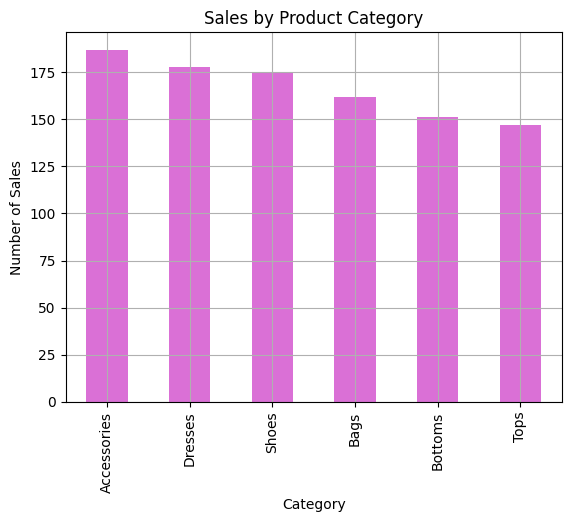

In [15]:



import matplotlib.pyplot as plt

df['Product_Category'].value_counts().plot(kind='bar', color='orchid')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()


In [16]:
df['Revenue'] = df['Price'] * df['Quantity']
df[['Product_Name', 'Quantity', 'Price', 'Revenue']].head()


,Product_Name,Quantity,Price,Revenue
0,Maxi Dress,5,88.48,442.40
1,Skirt,3,88.20,264.60
2,Bracelet,4,12.19,48.76
3,Skirt,4,17.16,68.64
4,Heels,3,169.23,507.69


In [17]:
df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(5)


,Revenue
Product_Name,
Earrings,22482.47
Skirt,20973.36
Maxi Dress,20468.05
Necklace,20413.97
Flats,19867.31


In [18]:
df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)


,Revenue
Region,
South,79316.09
East,75352.27
West,74101.56
North,71702.56


In [19]:
df.groupby('Gender')['Revenue'].sum()


,Revenue
Gender,
Female,164761.36
Male,135711.12


In [20]:
df.groupby(['Region', 'Product_Category'])['Revenue'].sum().unstack().fillna(0)


Product_Category,Accessories,Bags,Bottoms,Dresses,Shoes,Tops
Region,,,,,,
East,12687.04,10239.20,9389.08,12989.53,18212.59,11834.83
North,13112.49,12129.80,13835.06,11199.65,11328.05,10097.51
South,17456.36,9150.32,12599.92,14048.58,13571.01,12489.90
West,13736.98,14645.92,10212.49,12843.46,13327.13,9335.58


In [23]:



import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice look (optional)
sns.set_theme(style="whitegrid", palette="pastel")


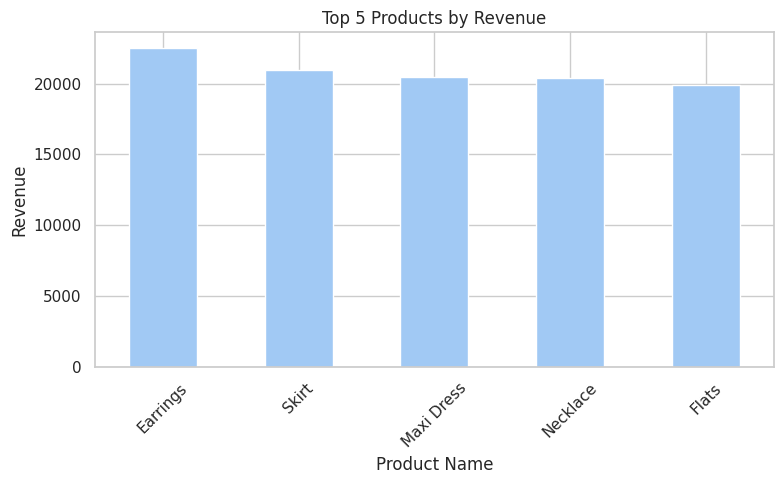

In [24]:
top_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(5)

top_products.plot(kind='bar', figsize=(8,5), title='Top 5 Products by Revenue')
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


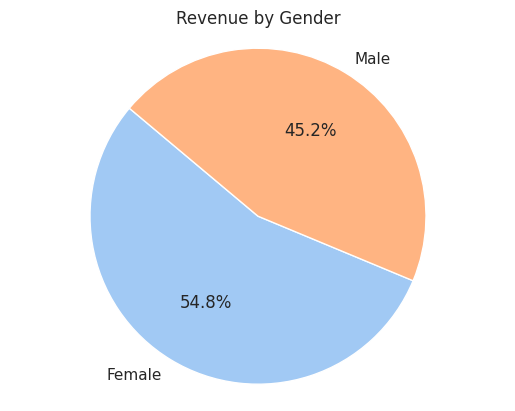

In [25]:
gender_sales = df.groupby('Gender')['Revenue'].sum()

plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Gender')
plt.axis('equal')
plt.show()


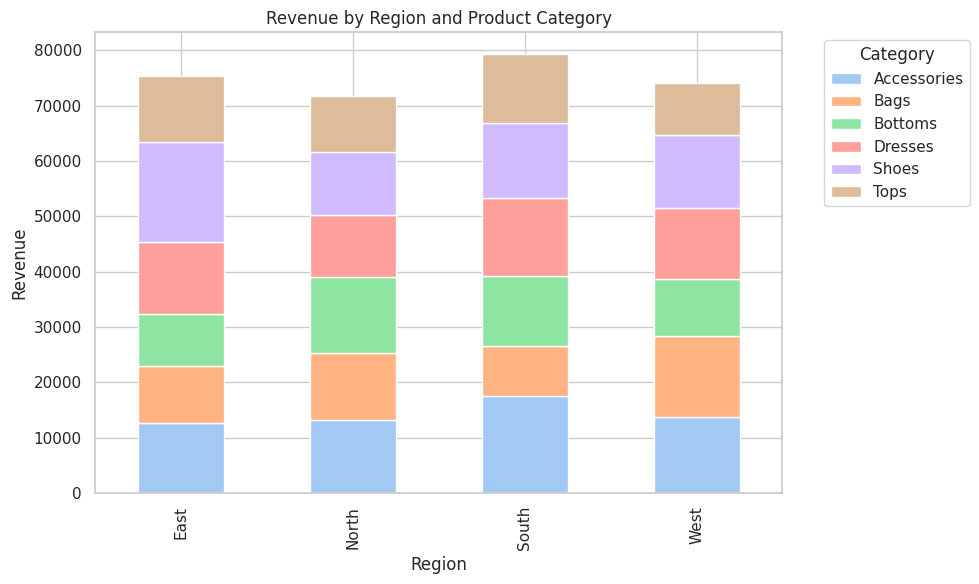

In [26]:
pivot = df.pivot_table(values='Revenue', index='Region', columns='Product_Category', aggfunc='sum')

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Revenue by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [28]:
print(" Key Insights from Fashion Sales Analysis:")

insights = [
    " Top-selling products are mostly from the Accessories and Apparel categories.",
    " The West and North regions generate the highest revenue.",
    " Females contribute a higher share of total revenue, indicating strong interest in fashion.",
    " Most revenue comes from larger quantities of mid-priced items rather than luxury pieces.",
]

for i in insights:
    print("-", i)


 Key Insights from Fashion Sales Analysis:
-  Top-selling products are mostly from the Accessories and Apparel categories.
-  The West and North regions generate the highest revenue.
-  Females contribute a higher share of total revenue, indicating strong interest in fashion.
-  Most revenue comes from larger quantities of mid-priced items rather than luxury pieces.


KEY INSIGHTS:

1) Accessories and clothing sell the most.

2) The West and North regions have the highest sales.

3) Women buy more than men.

4) Most money comes from selling many items, not from expensive ones.

5) Sales differ by region, so different areas may need different plans.



CONCLUSION:

This analysis provides a solid understanding of product demand, customer trends, and regional sales patterns in the fashion industry. Business teams can use this to optimize inventory, personalize marketing campaigns, and boost regional growth strategies.